# Import the libraries

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the data

In [ ]:
#from google.colab import files
#uploaded=files.upload()

In [ ]:
# Get the data
# log=pd.read_csv('tweet_clean111.csv')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Emotion_only_2022_12_9-2023_1_9tweet_clean.csv')
df=df.astype(str)

In [ ]:
df.head()

,Unnamed: 0,Date,User,clean_Tweet,Emotions
0,0,2023-01-09 23:55:12+00:00,aldotjahjadi8,China shifted Covid 19 Policy lot growth poten...,"{'fear': 0.0, 'anger': 0.3333333333333333, 'an..."
1,1,2023-01-09 23:52:06+00:00,KarenDa29372310,100 FACTSThe United States right cry mass shoo...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2,2,2023-01-09 23:51:07+00:00,typo_cat,Long Covid Endemic ChinaChina soon sync rest w...,"{'fear': 0.18181818181818182, 'anger': 0.09090..."
3,3,2023-01-09 23:51:03+00:00,THISDAYLIVE,LETS EXTRA EFFO PULL Adaptation key characteri...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
4,4,2023-01-09 23:48:53+00:00,Apont3Andr3s,China pide OMS imparcialidad sobre el Covid19h...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


# Create a function to get the subjectivity

In [ ]:
def getSubjectivity(clean_Tweet):
  return TextBlob(clean_Tweet).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(clean_Tweet):
  return TextBlob(clean_Tweet).sentiment.polarity
# Create two new columns
df['Subjectivity']=df['clean_Tweet'].apply(getSubjectivity)
df['Polarity']=df['clean_Tweet'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Unnamed: 0,Date,User,clean_Tweet,Emotions,Subjectivity,Polarity
0,0,2023-01-09 23:55:12+00:00,aldotjahjadi8,China shifted Covid 19 Policy lot growth poten...,"{'fear': 0.0, 'anger': 0.3333333333333333, 'an...",1.000000,0.000000
1,1,2023-01-09 23:52:06+00:00,KarenDa29372310,100 FACTSThe United States right cry mass shoo...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.450595,0.013095
2,2,2023-01-09 23:51:07+00:00,typo_cat,Long Covid Endemic ChinaChina soon sync rest w...,"{'fear': 0.18181818181818182, 'anger': 0.09090...",0.650000,0.275000
3,3,2023-01-09 23:51:03+00:00,THISDAYLIVE,LETS EXTRA EFFO PULL Adaptation key characteri...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.404242,0.013939
4,4,2023-01-09 23:48:53+00:00,Apont3Andr3s,China pide OMS imparcialidad sobre el Covid19h...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.000000,0.000000
...,...,...,...,...,...,...,...
56791,56791,2022-12-09 00:04:17+00:00,XHNews,past nearly years Xi Jinping leading China fig...,"{'fear': 0.06666666666666667, 'anger': 0.13333...",0.662500,0.087500
56792,56792,2022-12-09 00:03:11+00:00,txt_ipin,Inflation Rate CountriesPolitical tensions Rus...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.000000,0.000000
56793,56793,2022-12-09 00:00:45+00:00,thechinaproj,experts warn China facing possibility massive ...,"{'fear': 0.16666666666666666, 'anger': 0.0, 'a...",1.000000,0.000000
56794,56794,2022-12-09 00:00:01+00:00,sinoprise,British Chamber Commerce China welcomed Chines...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.083333,0.000000


In [ ]:
df.to_csv('Subjectivity_polarity_tweet_clean.csv')

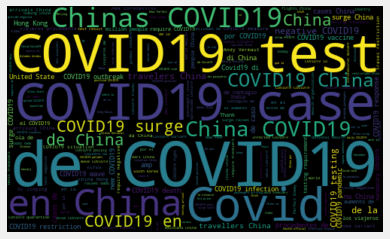

In [ ]:
from pandas.core.common import random_state
# Plot the word cloud
allWords=' '.join([twts for twts in df['clean_Tweet']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

# Show the dataFrame
df

,Unnamed: 0,Date,User,clean_Tweet,Emotions,Subjectivity,Polarity,Analysis
0,0,2023-01-09 23:55:12+00:00,aldotjahjadi8,China shifted Covid 19 Policy lot growth poten...,"{'fear': 0.0, 'anger': 0.3333333333333333, 'an...",1.000000,0.000000,Neutral
1,1,2023-01-09 23:52:06+00:00,KarenDa29372310,100 FACTSThe United States right cry mass shoo...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.450595,0.013095,Positive
2,2,2023-01-09 23:51:07+00:00,typo_cat,Long Covid Endemic ChinaChina soon sync rest w...,"{'fear': 0.18181818181818182, 'anger': 0.09090...",0.650000,0.275000,Positive
3,3,2023-01-09 23:51:03+00:00,THISDAYLIVE,LETS EXTRA EFFO PULL Adaptation key characteri...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.404242,0.013939,Positive
4,4,2023-01-09 23:48:53+00:00,Apont3Andr3s,China pide OMS imparcialidad sobre el Covid19h...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...
56791,56791,2022-12-09 00:04:17+00:00,XHNews,past nearly years Xi Jinping leading China fig...,"{'fear': 0.06666666666666667, 'anger': 0.13333...",0.662500,0.087500,Positive
56792,56792,2022-12-09 00:03:11+00:00,txt_ipin,Inflation Rate CountriesPolitical tensions Rus...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.000000,0.000000,Neutral
56793,56793,2022-12-09 00:00:45+00:00,thechinaproj,experts warn China facing possibility massive ...,"{'fear': 0.16666666666666666, 'anger': 0.0, 'a...",1.000000,0.000000,Neutral
56794,56794,2022-12-09 00:00:01+00:00,sinoprise,British Chamber Commerce China welcomed Chines...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.083333,0.000000,Neutral


In [ ]:
df.to_csv('v analysis_subjectivity_polarity_tweet_clean.csv')

In [ ]:
# Print all of the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+')'+sortedDF['clean_Tweet'][i])
    print()
    j=j+1

Streaming output truncated to the last 5000 lines.
11451)Oil rose Monday prospect demand recovery led Chinas loosening COVID19 curbs United States decision buy oil state reserves gained upper hand global recession fears httpstcov7LO43dLqW

11452)Oil rose Monday prospect demand recovery led Chinas loosening COVID19 curbs United States decision buy oil state reserves gained upper hand global recession fears httpstcoI3B6ZHcszi

11453)Didnt China Prepare Better Prevent Covid19 Deaths Bloomberg httpstcoCN75rvPNDU

11454)MEPs condemn violations fundamental freedoms amid peaceful antiCOVID19 protests China httpstcotYK253KA3n

11455)Chinas business confidence fell lowest January 2013 survey World Economics showed reflecting impact surging COVID19 cases economic activity abrupt lifting pandemic control measures httpstcoIaa2OY27Ol

11456)Mir fehlen gerade die Worte COVID19 China laufen zu lassen ist keine gute Idee War es nie und ist es nichtIch hoffe die Menschen besinnen sich wie gut sie es zu

In [ ]:
df.to_csv('v Positive_tweet_clean.csv')

In [ ]:
# print the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+')'+sortedDF['clean_Tweet'][i])
    print()
    j=j+1

Streaming output truncated to the last 5000 lines.
6176)Lizards trying fight Christmas arent COVID19 engineered China kill weak told u VaccineSideEffects httpstcowQX7q6MuFW

6177)China Leading Expert Suggests COVID19 Worse ColdFlu httpstco1u0UtaN1tS

6178)Chinas health authority Thursday stressed ramping treatment vulnerable COVID19 patients reinforcing preparedness elderly care facilities emergency care resources efforts lessen impact disease httpstcoFPdOaATXu8

6179)India starts random testing amid China COVID19 spike httpstcoUUrUvwypoc httpstco3Yh5HSaBd3

6180)support China past 3year COVID19 pandemic Investigated China twice didnt investigate Uncle Sam world function

6181)hard road ahead China COVID19 cases spiral httpstconwOQAcgGhO

6182)Sorry according local news country Indonesia recently Covid19 China average 5000 deaths day truehttpstcown4lBujZO7Download aplikasi httpstcoMQp3hllV7thttpstcop5HIoB7RE8

6183)past yearsChinas cargo trade kept increasing rapidly relieved pressure 

In [ ]:
df.to_csv('v Negative_tweet_clean.csv')

In [ ]:
# Plot the polarity and subjectivity
#plt.figure(figsize=(8,6))
#for i in range(0,df.shape[0]):
# plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

#plt.title('Sentiment Analysis')
#plt.xlabel('Polarity')
#plt.ylabel('Subjectivity')
#plt.show()

In [ ]:
# Get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['clean_Tweet']

round((ptweets.shape[0]/df.shape[0])*100,1)

24.6

In [ ]:
# Get the percentage of negative tweets
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['clean_Tweet']

round((ptweets.shape[0]/df.shape[0])*100,1)

15.3

In [ ]:
# Get the percentage of neutral tweets
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['clean_Tweet']

round((ptweets.shape[0]/df.shape[0])*100,1)

60.2

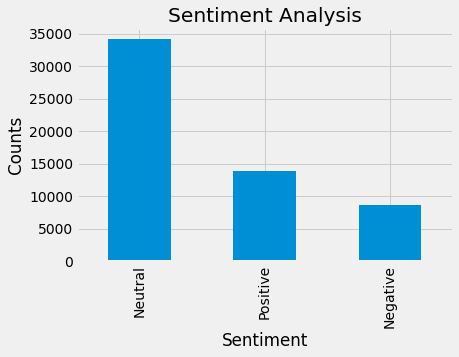

In [ ]:
# show the value counts
df['Analysis'].value_counts()

# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()